In [1]:
import os
import re
import matplotlib.pyplot as plt

In [2]:
# Define the base directory
base_dir = "/home/adil/Documents/TUE/ThesisPrepPhase/myProject/results/"

# Regex pattern to extract margin and threshold values from filenames
pattern = re.compile(r'marg-(\d+\.\d+)_thresh-(\d+\.\d+)')

# Store extracted data
results = {}

# Find all result files iteratively
file_paths = []
for root, _, files in os.walk(base_dir):
    for file in files:
        if file == "results.txt":
            file_paths.append(os.path.join(root, file))

for path in file_paths:
    match = pattern.search(path)
    if match:
        marg, thresh = match.groups()
        marg, thresh = float(marg), float(thresh)
        
        with open(path, 'r') as f:
            content = f.readlines()
            
        metrics = {}
        for line in content:
            key, value = line.split(': ')
            metrics[key.strip()] = float(value.strip())
        
        if marg not in results:
            results[marg] = {}
        
        results[marg][thresh] = metrics

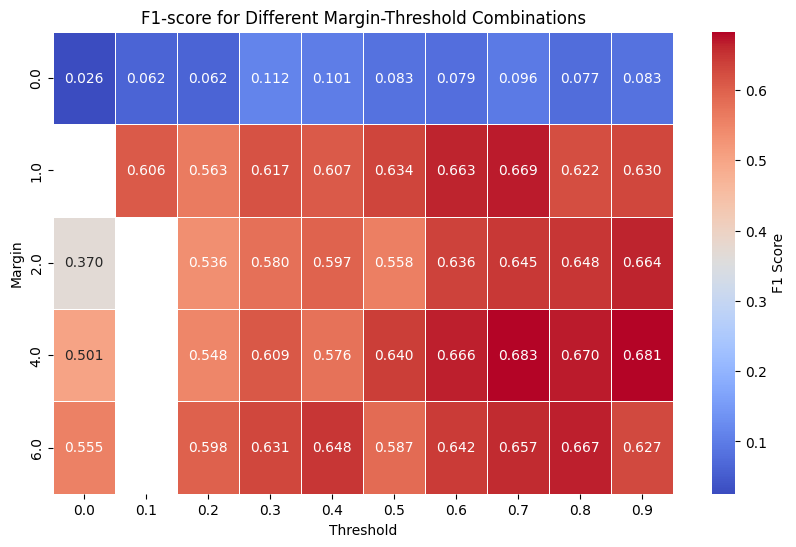

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract margins, thresholds, and corresponding F1 scores for conv3
margins = sorted(results.keys())
thresholds = sorted({t for m in results for t in results[m]})
f1_scores = [[results[m][t]['Average f1 score for conv3'] if t in results[m] else None for t in thresholds] for m in margins]

# Convert to DataFrame for heatmap
df = pd.DataFrame(f1_scores, index=margins, columns=thresholds)
df.index.name = "Margin"
df.columns.name = "Threshold"

# Create heatmap with numerical annotations
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5, cbar_kws={'label': 'F1 Score'})
plt.title("F1-score for Different Margin-Threshold Combinations")
plt.xlabel("Threshold")
plt.ylabel("Margin")

# Show plot
plt.show()

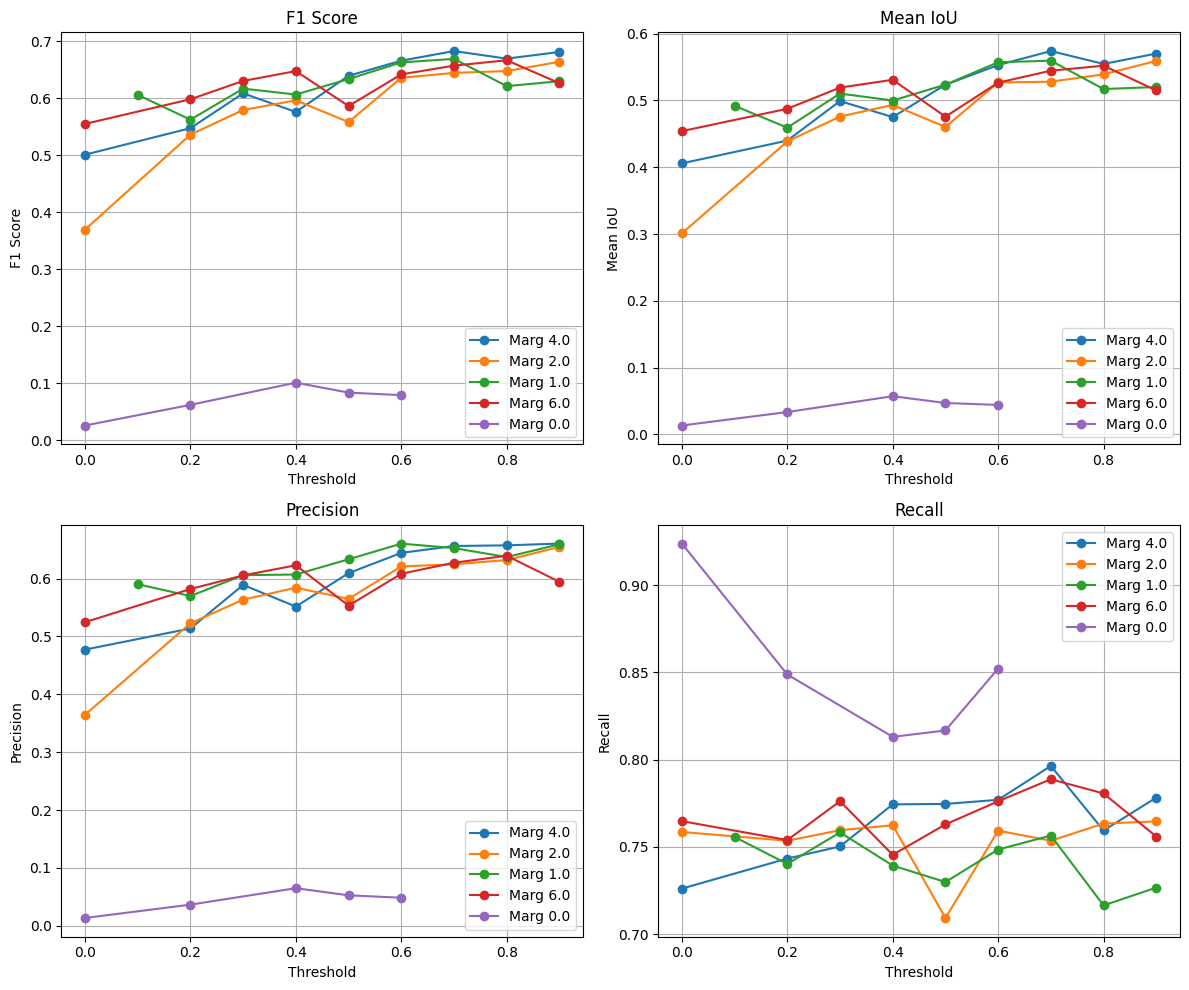

In [4]:

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metric_names = ["Average f1 score for conv3", "Average miou score for conv3", "Average precision for conv3", "Average recall for conv3"]
titles = ["F1 Score", "Mean IoU", "Precision", "Recall"]

for i, (ax, metric_name, title) in enumerate(zip(axes.flat, metric_names, titles)):
    for marg, thresh_values in results.items():
        thresholds = sorted(thresh_values.keys())
        values = [thresh_values[t][metric_name] for t in thresholds]
        ax.plot(thresholds, values, marker='o', label=f"Marg {marg}")
    ax.set_title(title)
    ax.set_xlabel("Threshold")
    ax.set_ylabel(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
